<a href="https://colab.research.google.com/github/jrfielder/jrfielder/blob/main/DATA606_HW6_John_Fielder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
# I was having issues with pymc3 so I used pymc4 and modified the code
import pymc as pm
# import pymc3 as pm

## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [12]:
## 1 point

## ToDo: read the csv file into a dataframe and show the first 5 rows
# df = pd.read_csv(r'C:/Users/jrfie/Downloads/archive/diabetes.csv')
df = pd.read_csv(r'/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
## 3 points
## Assign the Outcome variable to y and the rest to X.
y = df[["Outcome"]]
print(df.columns)

# Assign other columns to X
X = df.drop("Outcome", axis=1)

## USe LogisticRegression to fit the data and print out the intercept and the coefficients

# Logistic regression model, max_iter set to 1000 so that the algorithm converged
logreg_model = LogisticRegression(solver='lbfgs',max_iter=1000)
logreg_model.fit(X, y.values.ravel())

# Print the intercept and coefficients
print("The intercept is: ", logreg_model.intercept_)
print("The Coefficients are: ", logreg_model.coef_)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
The intercept is:  [-8.365745]
The Coefficients are:  [[ 1.22360947e-01  3.51105693e-02 -1.32968752e-02  7.86285043e-04
  -1.17366065e-03  8.96772163e-02  8.66279720e-01  1.50063634e-02]]


In [20]:
## 2 points

## Explain what the code is doing:
## What are the prior probabilities of the intercept and coefficients?
# Which likelihood distribution has been used?
## What does pm.invlogit(linreg) mean?
## What is map_est?


# Answers:
# The code is using logistic regression to predict the probability 
# of a binary outcome based off of Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, and Age.
# Based on the name of the csv file the binary outcome is if someone has diabetes or not.

# The prior probabilities of the intercept and coefficients are normal distributions with a mean of 0 and standard deviation of 100.

# A Bernoulli distribution is the likelyhood distribution being used to model the binary outcome.

# pm.invlogit() is the inverse of the logit function: 1/(1+exp(-x)). pm.invlogit(linreg) applies the inverse logit function to the linear regression equation to
# transform it into a probability scale from 0 and 1.

# Map_est is the local maximum a posteori given the model. In our model it's estimating the maximum for the parameters w0-w8 based on the outcome variable values.   


diab_df = df

# I was having issues with pymc3 so I used pymc4 and modified the code

with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sigma=100)
    w1 = pm.Normal('w1', mu=0, sigma=100)
    w2 = pm.Normal('w2', mu=0, sigma=100)
    w3 = pm.Normal('w3', mu=0, sigma=100)
    w4 = pm.Normal('w4', mu=0, sigma=100)
    w5 = pm.Normal('w5', mu=0, sigma=100)
    w6 = pm.Normal('w6', mu=0, sigma=100)
    w7 = pm.Normal('w7', mu=0, sigma=100)
    w8 = pm.Normal('w8', mu=0, sigma=100)
   
    
    linreg = w0 * np.ones(diab_df.shape[0]) + w1 * diab_df.Pregnancies.values + w2 * diab_df.Glucose.values \
    + w3 * diab_df.BloodPressure.values + w4 * diab_df.SkinThickness.values + w5 * diab_df.Insulin.values + \
    w6 * diab_df.BMI.values + w7 * diab_df.DiabetesPedigreeFunction.values + w8 * diab_df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=diab_df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)


{'w0': array(-8.40166888), 'w1': array(0.12311865), 'w2': array(0.0351519), 'w3': array(-0.01329542), 'w4': array(0.00061588), 'w5': array(-0.0011909), 'w6': array(0.0896803), 'w7': array(0.94448272), 'w8': array(0.01486235)}


array([[<Axes: title={'center': 'w0'}>, <Axes: title={'center': 'w1'}>,
        <Axes: title={'center': 'w2'}>],
       [<Axes: title={'center': 'w3'}>, <Axes: title={'center': 'w4'}>,
        <Axes: title={'center': 'w5'}>],
       [<Axes: title={'center': 'w6'}>, <Axes: title={'center': 'w7'}>,
        <Axes: title={'center': 'w8'}>]], dtype=object)

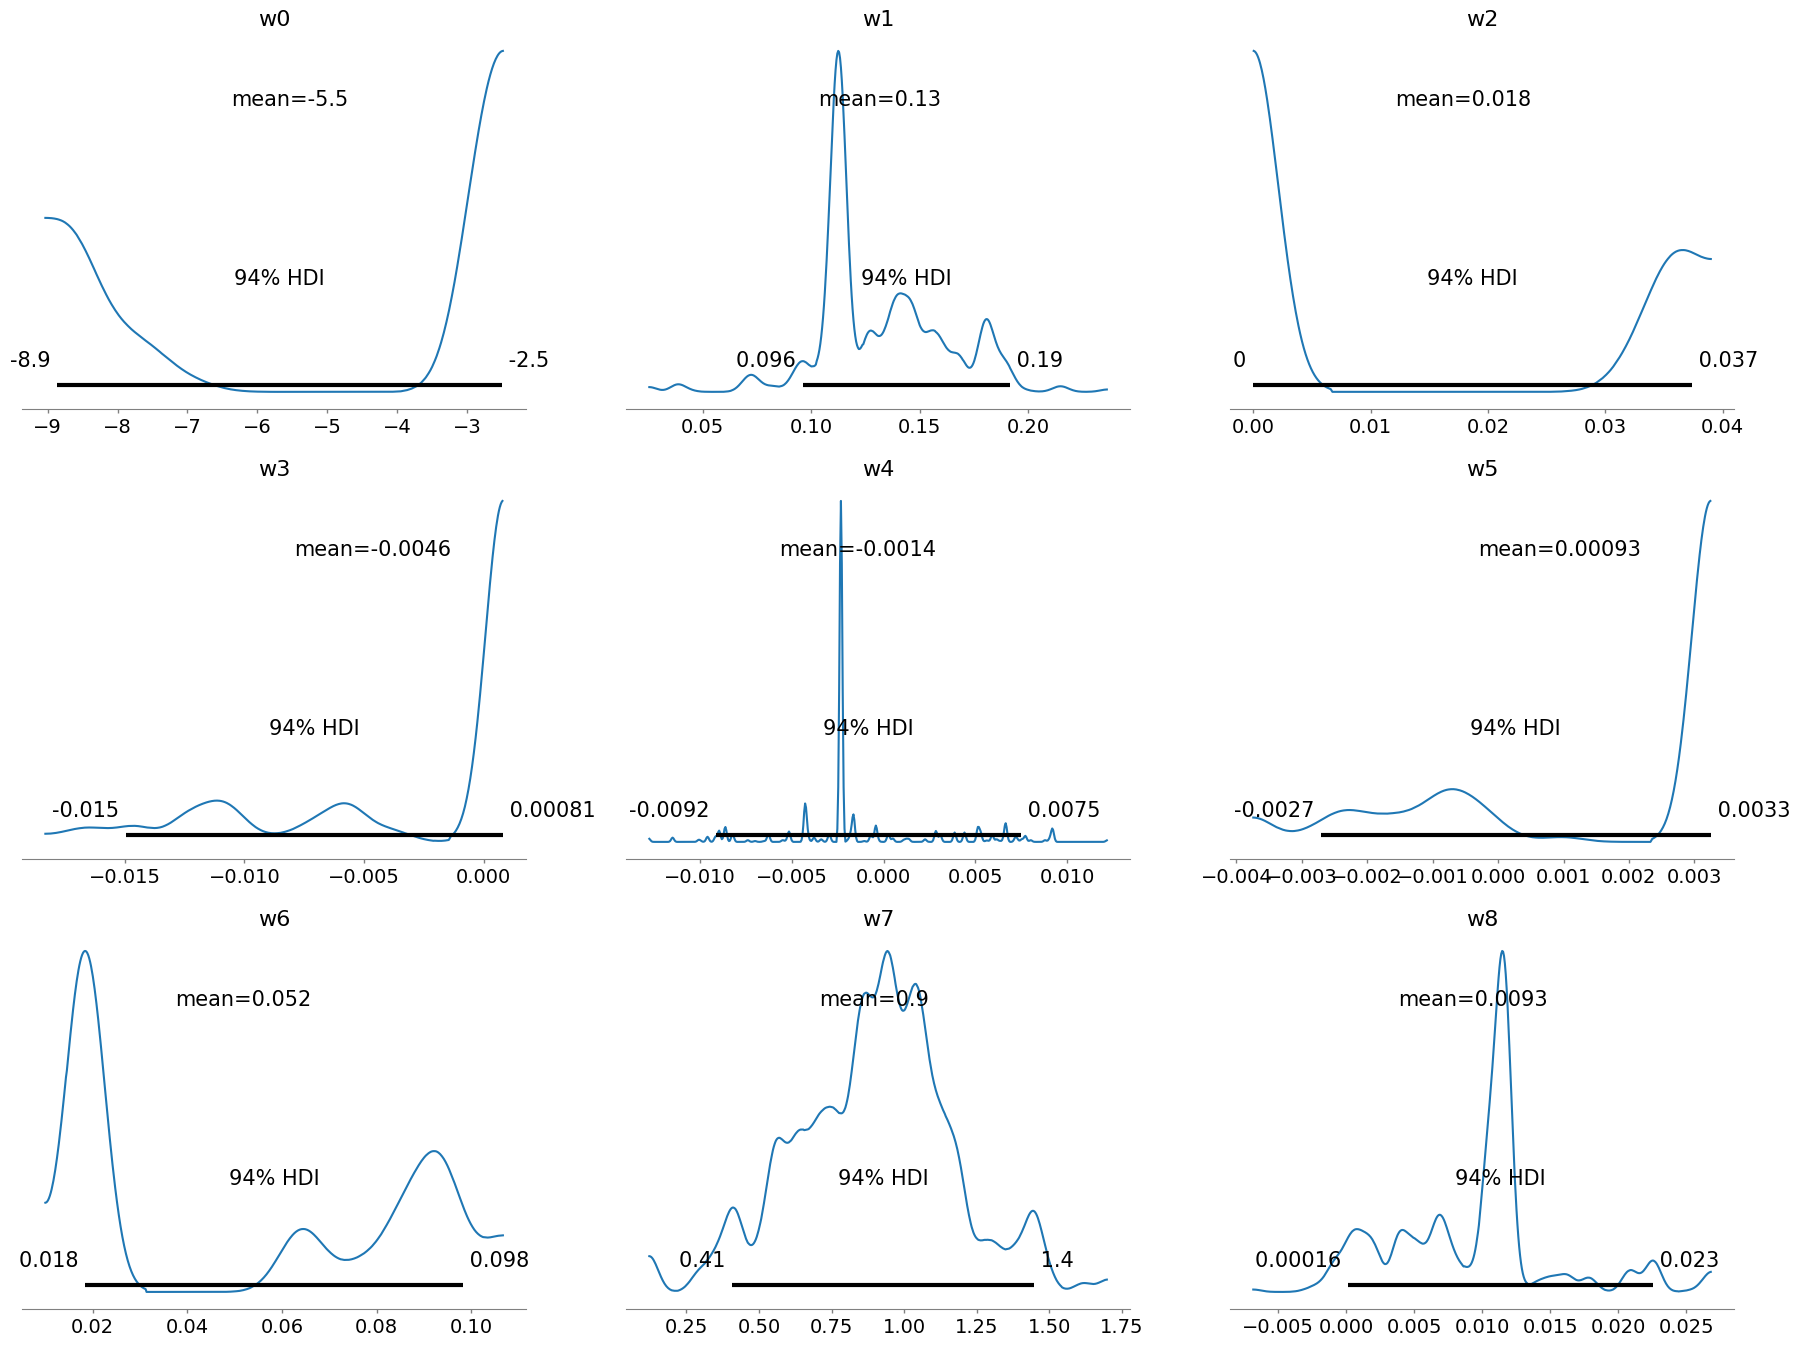

In [22]:
## 2 points

with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
    trace = pm.sample(400, step=pm.Metropolis(),return_inferencedata=True, progressbar=True)

## Explain the output of the plot 
az.plot_posterior(trace)

# The plot is giving the posterior after providing the 400 MCMC sample trace. 
# The plot shows the posterior distribution of each paramter w0 - w8, this includes its mean, standard deviation, and the 94% highest posterior density interval.
# For our plot it shows that the parameter w7 has a high positive correlation with the outcome. Or in other words the DiabetesPedigreeFunction shows high positive correlation for someone having diabetes.